# Wine - Exploratory Data Analysis

Attributes

    1)  Alcohol
	2)  Malic acid
	3)  Ash
	4)  Alcalinity of ash
	5)  Magnesium
	6)  Total phenols
	7)  Flavanoids
	8)  Nonflavanoid phenols
	9)  Proanthocyanins
	10) Color intensity
	11) Hue
	12) OD280/OD315 of diluted wines
	13) Proline   

In [7]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;

%matplotlib inline

from sklearn.preprocessing   import StandardScaler;
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV;
from sklearn.metrics         import classification_report,confusion_matrix;

from sklearn.neighbors       import KNeighborsClassifier;
from sklearn.tree            import DecisionTreeClassifier;
from sklearn.ensemble        import RandomForestClassifier;
from sklearn.svm             import SVC;
from sklearn.cluster         import KMeans;
from sklearn.decomposition   import PCA;

from sklearn.neural_network  import MLPClassifier;

In [2]:
wine = pd.read_csv('wine.data', header=None, 
                   names=['class', 'alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'phenols', 'flavanoids', 
                            'non_flavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD', 'proline']);

In [3]:
wine.head()

,class,alcohol,malic_acid,ash,ash_alcalinity,magnesium,phenols,flavanoids,non_flavanoid_phenols,proanthocyanins,color_intensity,hue,OD,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                    178 non-null int64
alcohol                  178 non-null float64
malic_acid               178 non-null float64
ash                      178 non-null float64
ash_alcalinity           178 non-null float64
magnesium                178 non-null int64
phenols                  178 non-null float64
flavanoids               178 non-null float64
non_flavanoid_phenols    178 non-null float64
proanthocyanins          178 non-null float64
color_intensity          178 non-null float64
hue                      178 non-null float64
OD                       178 non-null float64
proline                  178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [13]:
wine.describe()

,class,alcohol,malic_acid,ash,ash_alcalinity,magnesium,phenols,flavanoids,non_flavanoid_phenols,proanthocyanins,color_intensity,hue,OD,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


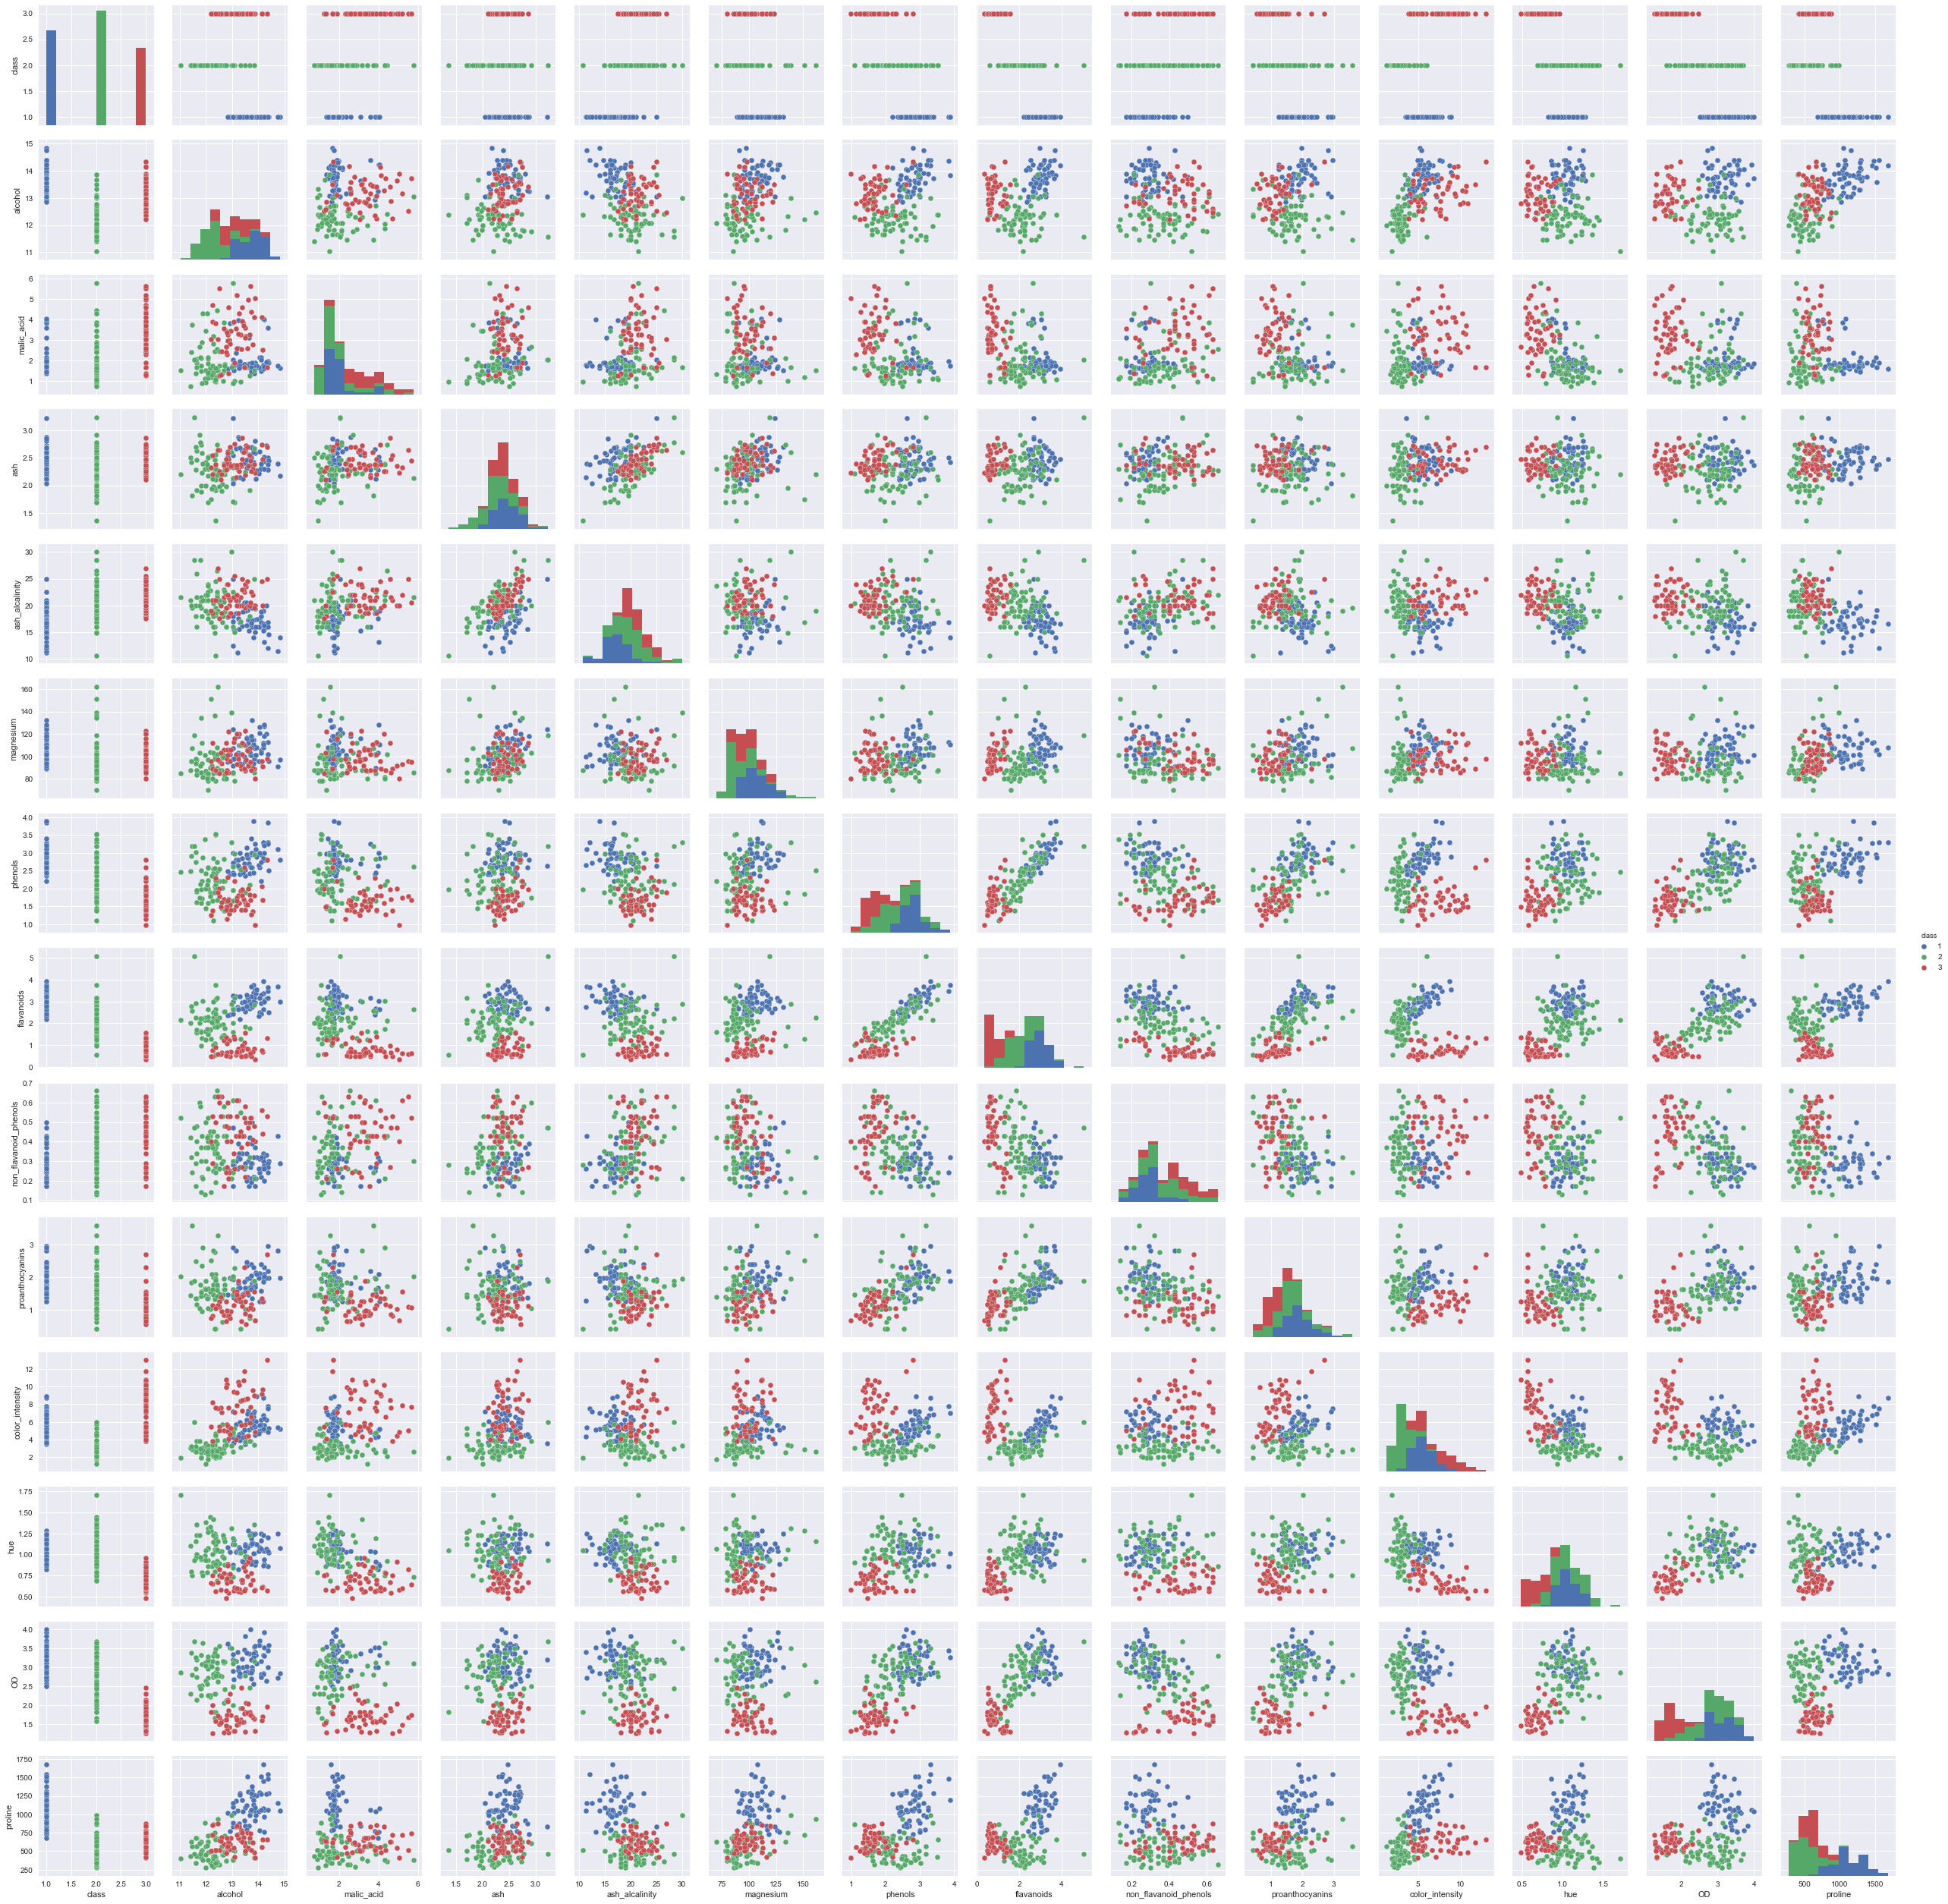

In [15]:
sns.pairplot(data=wine, hue='class')

# Scale and Train,Test,Split

In [5]:
# Scale features to mean = 1, std = 1

scaler = StandardScaler();

scaler.fit(wine.drop('class', axis=1));

scaled_wine = scaler.transform(wine.drop('class',axis=1));

wine_feat = pd.DataFrame(scaled_wine, columns=wine.columns[1:])
wine_feat.describe()

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,phenols,flavanoids,non_flavanoid_phenols,proanthocyanins,color_intensity,hue,OD,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [27]:
X_train, X_test, y_train, y_test = train_test_split(scaled_wine, wine['class'], test_size=0.9);

# K Nearest Neighbors

In [23]:
knn = KNeighborsClassifier(n_neighbors=1);

knn.fit(X_train,y_train);

pred = knn.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(knn, scaled_wine, wine['class'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[24  0  0]
 [ 5 30  1]
 [ 0  2 27]]


Classification Report
             precision    recall  f1-score   support

          1       0.83      1.00      0.91        24
          2       0.94      0.83      0.88        36
          3       0.96      0.93      0.95        29

avg / total       0.92      0.91      0.91        89



Cross Validation Scores
Accuracy: 0.94 (+/- 0.11)


In [28]:
param_grid = [{'n_neighbors': np.arange(1, 10),
               'weights':     ['uniform', 'distance'],
               'algorithm':   ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size':   np.arange(10, 100, 10)
              }]

grid = GridSearchCV(knn, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Estimator')
grid.best_estimator_

Best Score
0.977528089888


Best Estimator


KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Decision Tree

In [30]:
dtree = DecisionTreeClassifier();

dtree.fit(X_train,y_train);

pred = dtree.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(dtree, scaled_wine, wine['class'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[20  2  2]
 [ 0 34  2]
 [ 4  3 22]]


Classification Report
             precision    recall  f1-score   support

          1       0.83      0.83      0.83        24
          2       0.87      0.94      0.91        36
          3       0.85      0.76      0.80        29

avg / total       0.85      0.85      0.85        89



Cross Validation Scores
Accuracy: 0.89 (+/- 0.16)


In [43]:
param_grid = [{'criterion': ['gini', 'entropy'],
               'splitter':  ['best', 'random'],
               'max_features':  ['sqrt', 'log2', None],
               'class_weight': [None, 'balanced']
              }]

grid = GridSearchCV(dtree, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

Best Score
0.943820224719


Best Parameters


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': None,
 'splitter': 'random'}

# Random Forest

In [44]:
rfc = RandomForestClassifier(n_estimators=100);

rfc.fit(X_train,y_train);

pred = dtree.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(rfc, scaled_wine, wine['class'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[20  2  2]
 [ 0 34  2]
 [ 4  3 22]]


Classification Report
             precision    recall  f1-score   support

          1       0.83      0.83      0.83        24
          2       0.87      0.94      0.91        36
          3       0.85      0.76      0.80        29

avg / total       0.85      0.85      0.85        89



Cross Validation Scores
Accuracy: 0.98 (+/- 0.05)


In [46]:
param_grid = [{'criterion': ['gini', 'entropy'],
               'max_features':  ['sqrt', 'log2', None],
               'class_weight': [None, 'balanced']
              }]

grid = GridSearchCV(rfc, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

Best Score
0.977528089888


Best Parameters


{'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt'}

# Support Vector Machine

In [47]:
svc_model = SVC();

svc_model.fit(X_train,y_train)

pred = svc_model.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(svc_model, scaled_wine, wine['class'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[24  0  0]
 [ 0 36  0]
 [ 0  3 26]]


Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        24
          2       0.92      1.00      0.96        36
          3       1.00      0.90      0.95        29

avg / total       0.97      0.97      0.97        89



Cross Validation Scores
Accuracy: 0.98 (+/- 0.05)


In [50]:
param_grid = [{'C': np.arange(1, 3, 1),
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               'degree': [2, 3, 4, 5]
              }]

grid = GridSearchCV(svc_model, param_grid, cv=10)

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

#print('Mean Test Standard Deviations')
#print(grid.cv_results_['std_train_score'])
#print('\n')

print('Best Parameters')
grid.best_params_

print('Best Estimator')
grid.best_estimator_

Best Score
0.988764044944


Best Parameters


{'C': 2, 'degree': 2, 'kernel': 'rbf'}

# K Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=3);

kmeans.fit(wine.drop('class', axis=1));

# Principle Component Analysis

(178, 13)
(178, 2)


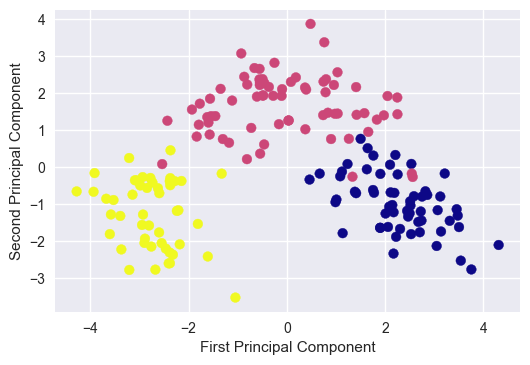

In [36]:
pca = PCA(n_components=2);

pca.fit(scaled_wine);

x_pca = pca.transform(scaled_wine);

print(scaled_wine.shape);
print(x_pca.shape);

fig  = plt.figure(figsize=(6, 4), dpi=100);

axes1 = fig.add_subplot(111); 

axes1.scatter(x_pca[:,0], x_pca[:,1], c=wine['class'], cmap='plasma')
axes1.set_xlabel('First Principal Component')
axes1.set_ylabel('Second Principal Component')

In [37]:
wine.drop('class', axis=1).columns

Index(['alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium',
       'phenols', 'flavanoids', 'non_flavanoid_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'OD', 'proline'],
      dtype='object')

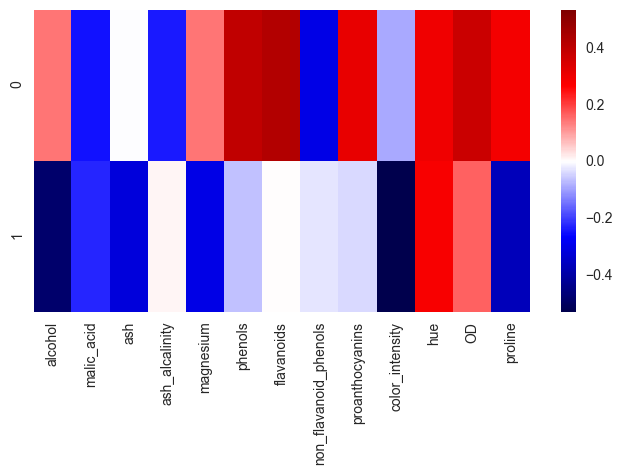

In [40]:
df_comp = pd.DataFrame(pca.components_, columns=['alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'phenols', 'flavanoids', 
                            'non_flavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD', 'proline'])

fig  = plt.figure(figsize=(8, 4), dpi=100);

axes1 = fig.add_subplot(111); 

sns.heatmap(df_comp, cmap='seismic', ax=axes1)

In [32]:
df = pd.DataFrame(data=np.array([x_pca[:,0],x_pca[:,1]]).transpose())

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, wine['class'], test_size=0.75);

NameError: name 'df' is not defined

In [34]:
knn = KNeighborsClassifier(n_neighbors=1);

knn.fit(X_train,y_train);

pred = knn.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test,pred));
print("\n")

print("Classification Report")
print(classification_report(y_test,pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(knn, scaled_wine, wine['class'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[35  1  0]
 [ 4 33  1]
 [ 0  0 15]]


Classification Report
             precision    recall  f1-score   support

          1       0.90      0.97      0.93        36
          2       0.97      0.87      0.92        38
          3       0.94      1.00      0.97        15

avg / total       0.94      0.93      0.93        89



Cross Validation Scores
Accuracy: 0.94 (+/- 0.11)


# Multi-Layer Perceptron

In [32]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1);

clf.fit(X_train,y_train);

pred = clf.predict(X_test);

print("Confusion Matrix")
print(confusion_matrix(y_test, pred));
print("\n")

print("Classification Report")
print(classification_report(y_test, pred));
print("\n")

print("Cross Validation Scores")
scores = cross_val_score(clf, scaled_wine, wine['class'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Confusion Matrix
[[54  0  0]
 [ 6 55  2]
 [ 0  1 43]]


Classification Report
             precision    recall  f1-score   support

          1       0.90      1.00      0.95        54
          2       0.98      0.87      0.92        63
          3       0.96      0.98      0.97        44

avg / total       0.95      0.94      0.94       161



Cross Validation Scores
Accuracy: 0.97 (+/- 0.05)


In [31]:
param_grid = [{'activation': ['identity', 'logistic', 'tanh', 'relu'],
              }]

grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print('Best Score')
print(grid.best_score_)
print('\n')

print('Mean Test Score')
print(grid.cv_results_['mean_train_score'])
print('\n')

print('Best Parameters')
grid.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best Score
0.882352941176


Mean Test Score
[ 1.          1.          1.          0.98461538]


Best Parameters


{'activation': 'identity'}